# Srinidhi Bharadwaj Kalgundi Srinivas
# A59010584

# CSE 276C - Homework 4

# Problem 1:

Solution:

__Principal Component Analysis__
- Training and test images are read from Train_subset and Test_subset csv files respectively and stored in numpy arrays
- PCA is performed on the training images and componets are plotted to calculate the optimal number of components and for the given dataset __90__ components are selected for best accuracy
- PCA transform is applied on the training images and support vector machine classifier is used for image classification
- Accuracy obtained: __71.44%__
- First and second Eigen images are plotted below.
- For better understanding, PCA with 2 components is calculated and reduced components are plotted below

__Linear Discriminant Analysis__
- LDA is performed on the images that which have been passed through PCA pipeline with 90 components
- Output of LDA has 42 components which results in highest accuracy
- Accuracy obtained: __80.62%__
- LDA is calculated with 2 compnents for plotting eigen vectors
- LDA plot is as shown below


__Performance improvement__
- Increased training images could be used for achieving better accuracy
- Sophisticated classifiers such as Convolutional Neural Network, Random forest regression, K-Nearest Neighbors could be used to improve classification accuracy

Note: Confusion matrix for PCA is added for better understanding.

In [1]:
from time import time
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
from PIL import Image
import csv
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import math
import seaborn as sn

In [2]:
train_file = 'KaggleDataset/Train_subset.csv'
test_file = 'KaggleDataset/Test_subset.csv'
train_image = []
train_label = []
test_images = []
test_label = []

#Read the images
with open(train_file, 'r') as csvfile:
    datareader = csv.reader(csvfile)
    next(datareader, None)  
    for row in datareader:
        im = Image.open(row[8])
        im = im.resize((32, 32))
        train_image.append(np.array(im).flatten())
        train_label.append(row[7])

with open(test_file, 'r') as testFile:
    r = csv.reader(testFile)
    next(r, None)
    for row in r:
        im = Image.open(row[8])
        im = im.resize((32, 32))
        test_images.append(np.array(im).flatten())
        test_label.append(row[7])
        
train_image = np.array(train_image).astype(float)
train_label = np.array(train_label).astype(int)
test_images = np.array(test_images).astype(float)
test_label = np.array(test_label).astype(int)

In [3]:
print(train_image.shape)
print(train_label.shape)
print(test_images.shape)
print(test_label.shape)

(10000, 3072)
(10000,)
(5000, 3072)
(5000,)


In [4]:
pca = PCA(whiten=True)
pca.fit(train_image)

PCA(whiten=True)

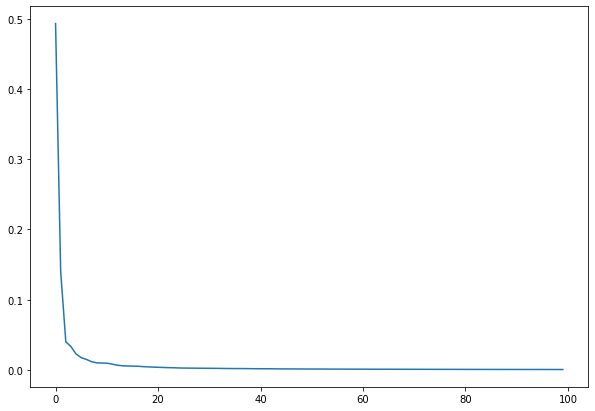

In [5]:
plt.figure(figsize=(10,7))
plt.plot(pca.explained_variance_ratio_[:100])

## Considering 90 components for PCA from the above graph

In [6]:
svc=SVC()
pca = PCA(n_components=90, whiten=True)
pca.fit(train_image)
train_img = pca.transform(train_image)
test_img = pca.transform(test_images)
svc.fit(train_img,train_label)
y_pred=svc.predict(test_img)
print(f"The model with 90 compnents is {round(accuracy_score(y_pred,test_label)*100, 2)}% accurate")

The model with 90 compnents is 71.44% accurate


In [7]:
def grayscale_convert(rgb):
    red, green, blue = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * red + 0.5870 * green + 0.1140 * blue
    return gray

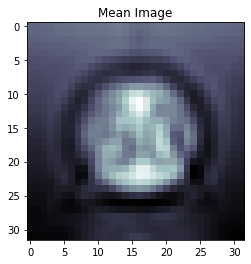

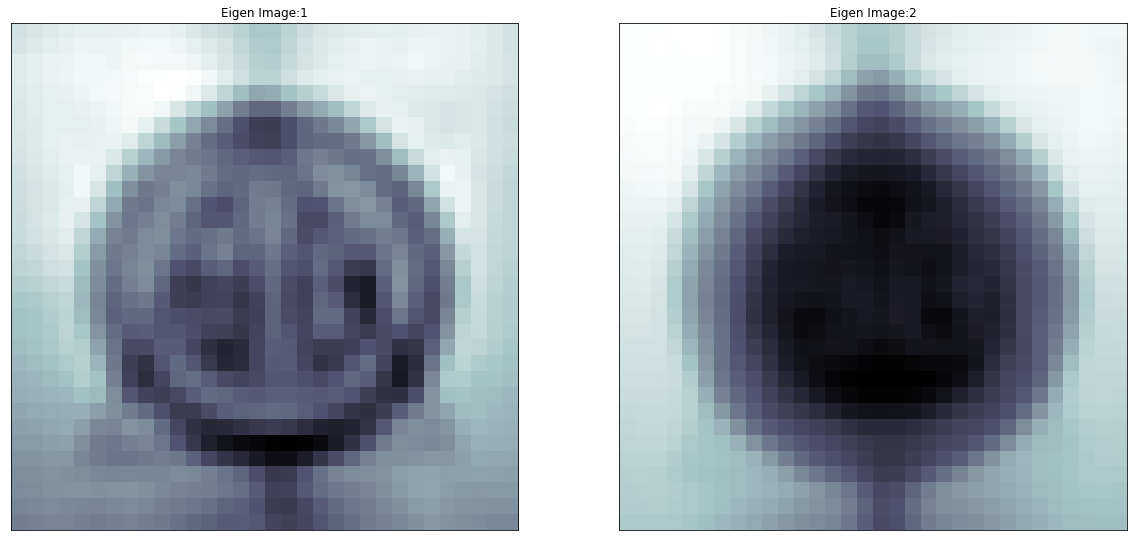

In [8]:
plt.imshow(grayscale_convert(pca.mean_.reshape(32,32,3)),cmap=plt.cm.bone)
plt.title("Mean Image")
plt.show()


fig = plt.figure(figsize=(20, 20))
for i in range(2):
    ax = fig.add_subplot(1, 2, i + 1, xticks=[], yticks=[])
    ax.imshow(grayscale_convert(pca.components_[i].reshape(32,32,3)),cmap=plt.cm.bone)
    ax.set_title("Eigen Image:{}".format(i+1))

In [9]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_pred, test_label)

In [10]:
import pandas as pd
svc=SVC()
pca = PCA(n_components=2, whiten=True)
pca.fit(train_image)
train_img = pca.transform(train_image)

#Create a dataframe of training images (reduced features)
principalDf = pd.DataFrame(data = train_img
             , columns = ['principal component 1', 'principal component 2'])
#Create a dataframe of training labels
df = pd.DataFrame(train_label, columns = ['Column_A'])
#Concatenate the 2 data frames
finalDf = pd.concat([principalDf, df], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Column_A
0,0.677933,1.210816,12
1,0.091513,-0.944670,13
2,-0.358298,0.279786,31
3,1.673283,0.930087,12
4,1.770278,-1.029254,9


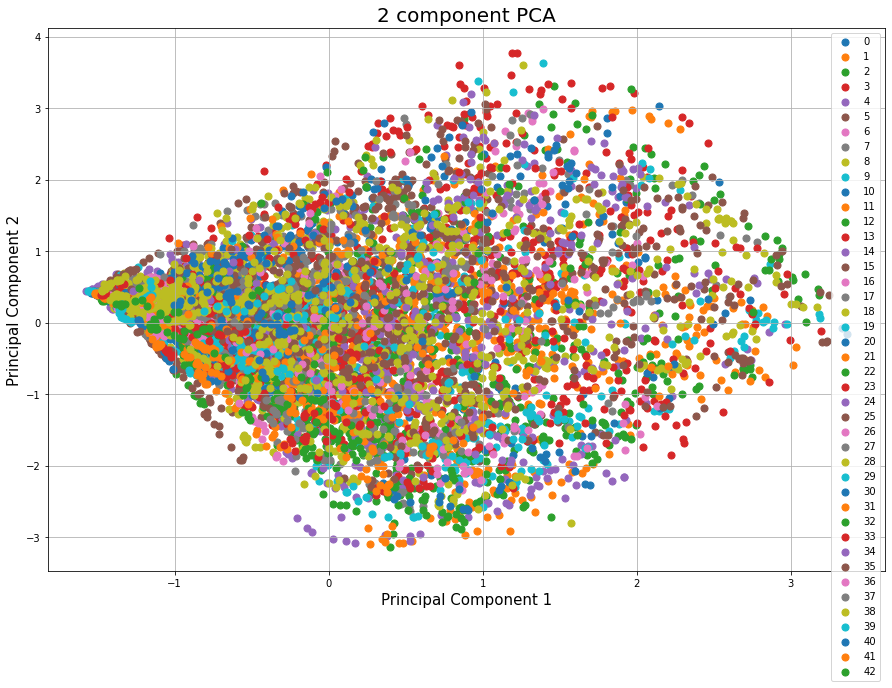

In [11]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

#Collect the unique labels for looping
targets = np.unique(train_label)

for target in (targets):
    indicesToKeep = finalDf['Column_A'] == target #Get the index of individual training labels
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , s = 50)

ax.legend(targets)
ax.grid()

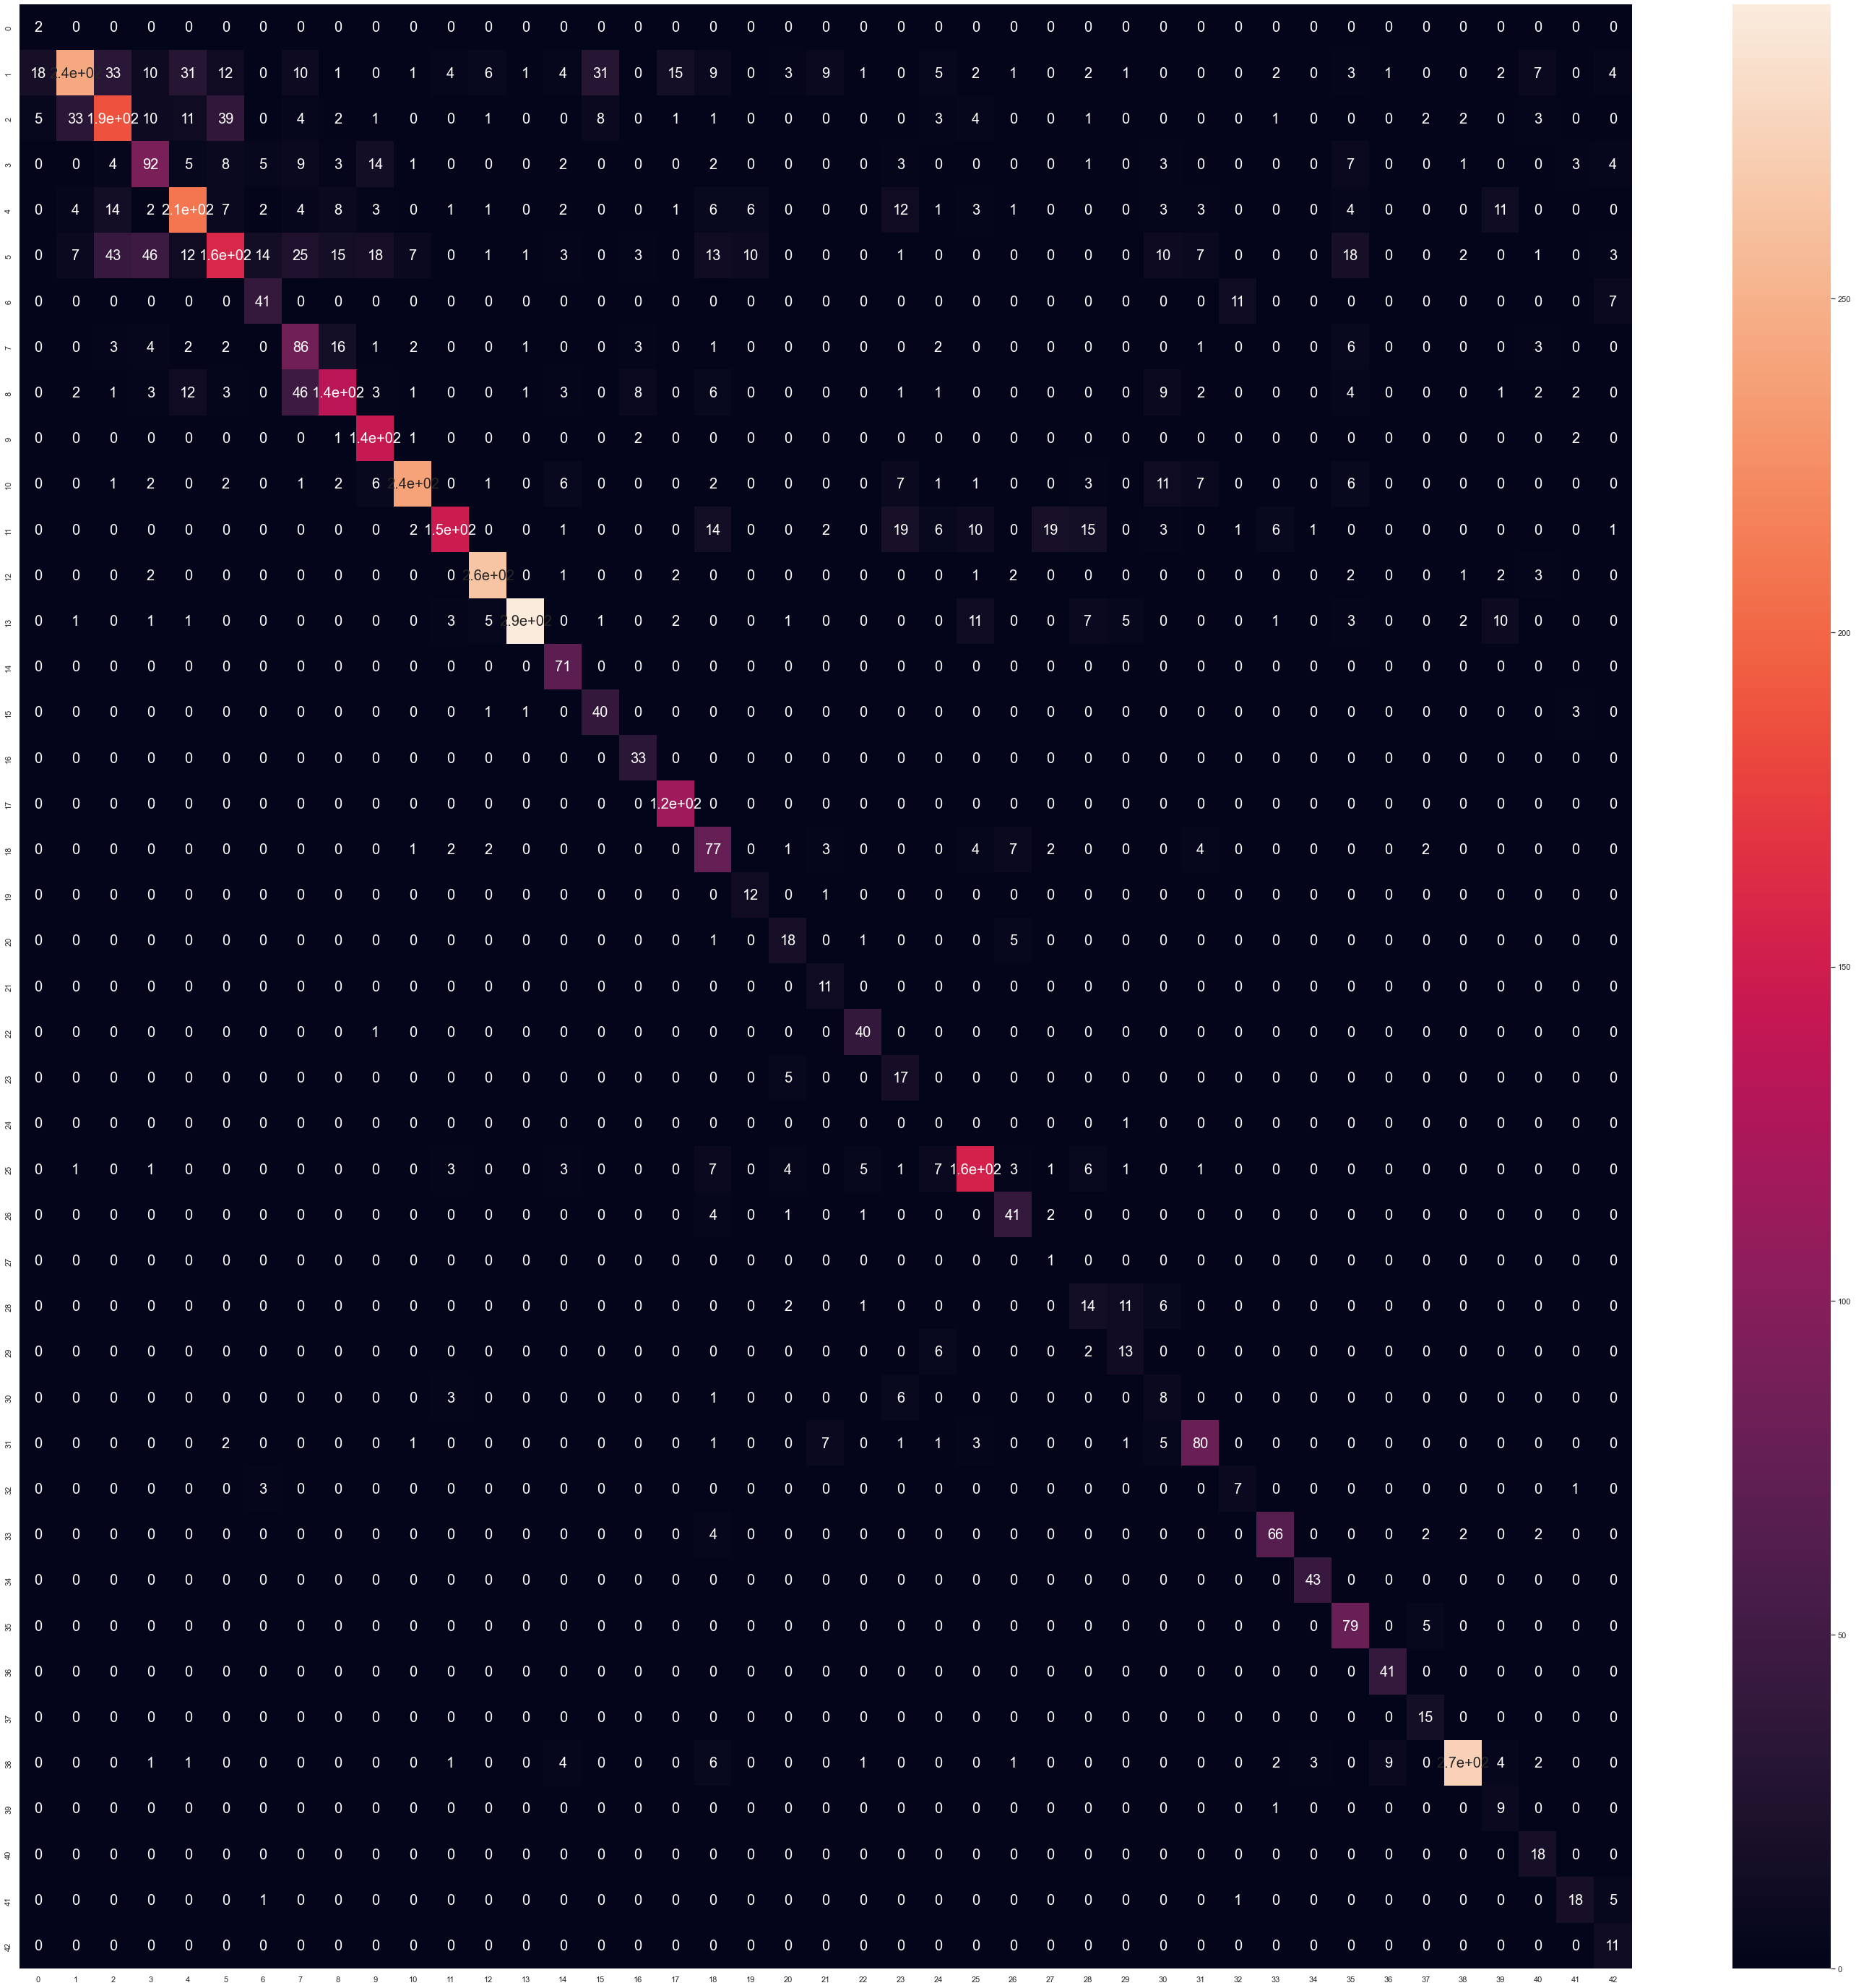

In [12]:
#Create a dataframe for confusion matrix
df_cm = pd.DataFrame(matrix, range(43), range(43))
plt.figure(figsize=(50,50))
sn.set(font_scale=1) # for label size
sn.heatmap(matrix, annot=True, annot_kws={"size": 20}) # font size
plt.show()

## Linear Discriminant Analysis

In [13]:
svc=SVC() #Support vector machine classifier instance 
pca = PCA(n_components=90, whiten=True) #PCA with 90 components
pca.fit(train_image) #Fit the training image

#Transform training and test images with 90 components
train_img = pca.transform(train_image)
test_img = pca.transform(test_images)

In [14]:
#Perform Linear Discriminant Analysis on the training images with reduces feature set (90 components)
lda = LDA()
train_img_lda = lda.fit_transform(train_img, train_label)
test_img_lda = lda.transform(test_img)

In [15]:
#Perform classification using SVM
svc_lda = SVC()
svc_lda.fit(train_img_lda, train_label)
y_pred = svc_lda.predict(test_img_lda)
print(f"The model with 90 compnents is {round(accuracy_score(y_pred,test_label)*100, 2)}% accurate")

The model with 90 compnents is 80.62% accurate


In [16]:
#Use 2 components LDA
lda = LDA(n_components=2)
#Perform and fit LDA for training images
train_img_fit = lda.fit(train_img, train_label)
train_image_lda = lda.transform(train_img)
#Create dataframes to plot the values
principalDf = pd.DataFrame(data = train_image_lda
             , columns = ['lda component 1', 'lda component 2'])
df = pd.DataFrame(train_label, columns = ['Classification Labels'])
finalDf = pd.concat([principalDf, df], axis = 1)
finalDf.head(5)

,lda component 1,lda component 2,Classification Labels
0,0.097407,0.175069,12
1,-2.994762,-7.065612,13
2,0.133392,1.426983,31
3,-0.848033,1.449090,12
4,-5.316744,1.744225,9


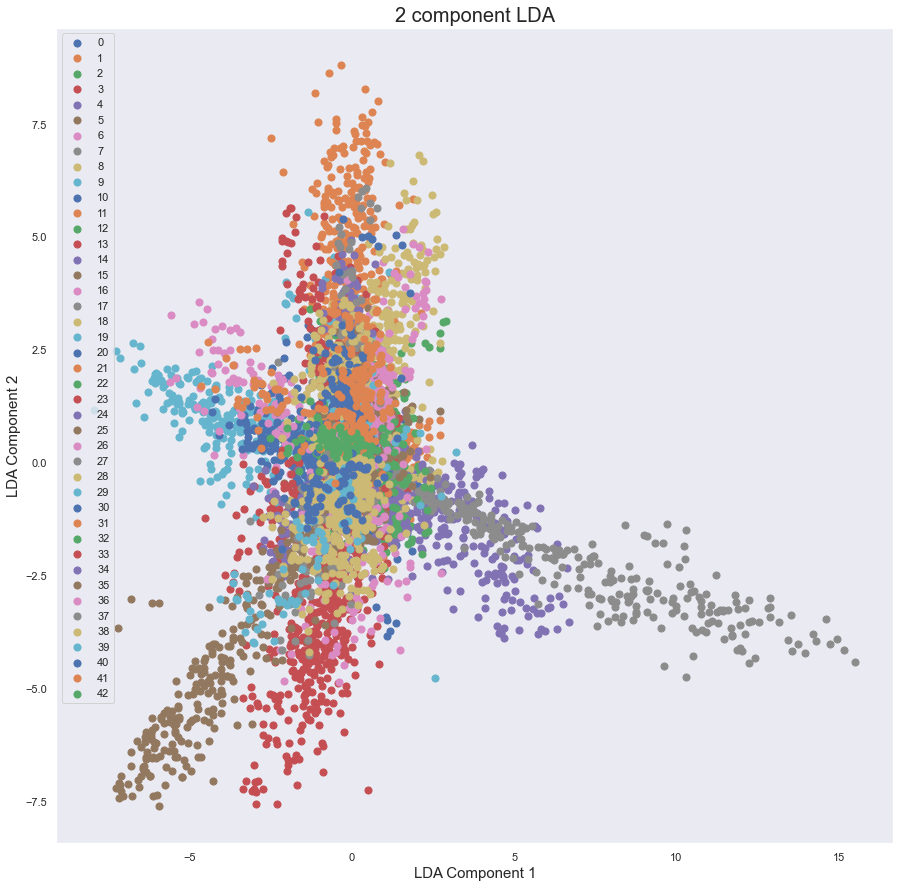

In [17]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('LDA Component 1', fontsize = 15)
ax.set_ylabel('LDA Component 2', fontsize = 15)
ax.set_title('2 component LDA', fontsize = 20)
targets = np.unique(train_label)

for target in (targets):
    indicesToKeep = finalDf['Classification Labels'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'lda component 1']
               , finalDf.loc[indicesToKeep, 'lda component 2']
               , s = 50)

ax.legend(targets)
ax.grid()

# Problem 2: Lotka Volterra Model

### Solution:
- Algorithm uses Runge Kutta 4 solver to calculate solve the differential equation
- h = 0.001
- Initial conditions are described in x=[x1, x2]=[0.3, 0.2]
- Graph is plotted for calculated x1 and x2 values intermediately 

### Interpretation:
- As it can be observed in the graph;
  - In the absence of predator population, prey population increases until predator population starts to increase
  - When the predator population increases, prey population starts to decrease
  - Predators without food (prey) start to decrease in numbers until a point where prey start to increase due to reduced predatorial numbers
  - Cycle repeats
  
### Equation interpretation:
- Prey reproduce exponentially and this is represented by the term bx1
- The rate of predation upon the prey is assumed to be proportional to the rate at which the predators and the prey meet, this is represented above by p * x1 * y
- r * x1 * x2 represents predator population growth
- d * x2 represents loss of predators

In [18]:
import numpy as np
from matplotlib import pyplot as plt

In [19]:
# Using my rk4 solver from previous homework
def runge_kutta(r, t, h):
        k1 = h*lotka_volterra(r, t)
        k2 = h*lotka_volterra(r+0.5*k1, t+0.5*h)
        k3 = h*lotka_volterra(r+0.5*k2, t+0.5*h)
        k4 = h*lotka_volterra(r+k3, t+h)
        return (k1 + 2*k2 + 2*k3 + k4)/6

#Lotka-Volterra model funciton
def lotka_volterra(cond, t):
        b = p = r = d = 1.0
        x = cond[0] #Initial condition for prey
        y = cond[1] #Initial condition for predator
        fxd = x*(b - p*y) #Prey population update function
        fyd = (r*x - d)*y #Predator population update function
        return np.array([fxd, fyd], float)


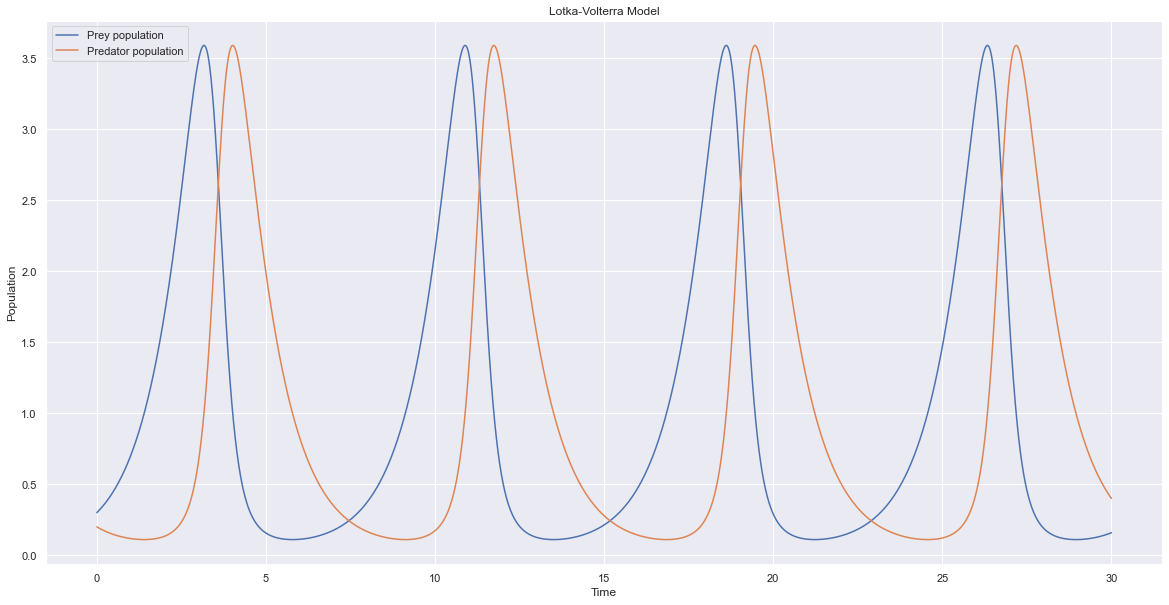

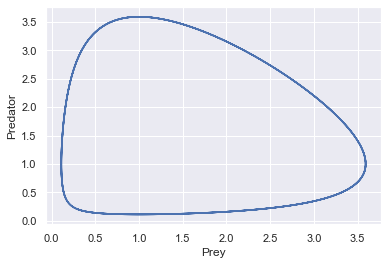

In [20]:
h=0.001                               
tpoints = np.arange(0, 30, h)         
xpoints, ypoints  = [], []
x = np.array([0.3, 0.2], float)

#Looping through each time step
#Input to a timestep is the output from the previous set
#At t=0, input is [0.3, 0.2]
#Accumulate x1 and x2 values at each timestep based on the previous step
for t in tpoints:
    xpoints.append(x[0])          
    ypoints.append(x[1])          
    x += runge_kutta(x, t, h)
        
plt.figure(figsize=(20,10))
plt.plot(tpoints, xpoints, label='Prey population')
plt.plot(tpoints, ypoints, label='Predator population')
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Lotka-Volterra Model")
plt.legend()

plt.show()

plt.xlabel("Prey")
plt.ylabel("Predator")
plt.plot(xpoints, ypoints)